In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv("/home/placement/Downloads/fiat500.csv")

In [2]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [3]:
data1=data.drop(['lat','lon','ID'],axis=1)

In [4]:
data1

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [5]:
data1.shape

(1538, 6)

In [6]:
data2=data1.loc[(data1.model=='lounge')]

In [7]:
data2

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
3,lounge,51,2739,160000,1,6000
6,lounge,51,731,11600,1,10750
7,lounge,51,1521,49076,1,9190
11,lounge,51,366,17500,1,10990
...,...,...,...,...,...,...
1528,lounge,51,2861,126000,1,5500
1529,lounge,51,731,22551,1,9900
1530,lounge,51,670,29000,1,10800
1534,lounge,74,3835,112000,1,4600


In [8]:
data2=pd.get_dummies(data2)#converting the string column model into 3 individual columns as digits

In [9]:
data2

,engine_power,age_in_days,km,previous_owners,price,model_lounge
0,51,882,25000,1,8900,1
3,51,2739,160000,1,6000,1
6,51,731,11600,1,10750,1
7,51,1521,49076,1,9190,1
11,51,366,17500,1,10990,1
...,...,...,...,...,...,...
1528,51,2861,126000,1,5500,1
1529,51,731,22551,1,9900,1
1530,51,670,29000,1,10800,1
1534,74,3835,112000,1,4600,1


In [10]:
data2.shape

(1094, 6)

In [11]:
y=data2['price'] #adding to seperate dataframe the value,we want to predict
x=data2.drop('price',axis=1)#removing the value we want to predict from the original dataframe

In [12]:
y

0        8900
3        6000
6       10750
7        9190
11      10990
        ...  
1528     5500
1529     9900
1530    10800
1534     4600
1536     5990
Name: price, Length: 1094, dtype: int64

In [13]:
#divide data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [14]:
x_test

,engine_power,age_in_days,km,previous_owners,model_lounge
676,51,762,18609,1,1
215,51,701,25000,1,1
146,51,4018,152900,1,1
1319,51,731,20025,1,1
1041,51,640,38231,1,1
...,...,...,...,...,...
757,51,4018,102841,1,1
167,51,397,15341,1,1
156,51,1858,35304,1,1
1145,51,456,14970,1,1


In [15]:
x_train

,engine_power,age_in_days,km,previous_owners,model_lounge
441,51,762,36448,1,1
701,51,701,27100,1,1
695,51,3197,51083,1,1
1415,51,670,33000,1,1
404,51,456,14000,1,1
...,...,...,...,...,...
459,51,397,15628,1,1
654,51,3227,95554,1,1
189,51,1431,81900,1,1
1455,51,701,33942,1,1


In [16]:
x_test.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge
676,51,762,18609,1,1
215,51,701,25000,1,1
146,51,4018,152900,1,1
1319,51,731,20025,1,1
1041,51,640,38231,1,1


In [17]:
y_train.head()

441      8980
701     10300
695      5880
1415    10490
404      9499
Name: price, dtype: int64

In [18]:
y_train

441      8980
701     10300
695      5880
1415    10490
404      9499
        ...  
459     10850
654      5900
189     10000
1455     9400
1218     8900
Name: price, Length: 732, dtype: int64

In [19]:
y_test

676     10250
215      9790
146      5500
1319     9900
1041     8900
        ...  
757      6000
167     10950
156      8000
1145    10700
1393     9400
Name: price, Length: 362, dtype: int64

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
ridge = Ridge()
parameters = {'alpha': alpha}
ridge_regressor = GridSearchCV(ridge, parameters)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [21]:
ridge_regressor.best_params_

{'alpha': 30}

In [22]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error #calculating MSE
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

519771.8129989745

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8373030813683994

In [25]:
Results=pd.DataFrame(columns=['Price','Predicted'])
Results['Price']=y_test
Results['Predicted']=y_pred_ridge
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,Price,Predicted,Id
0,676,10250,10045.347779,0
1,215,9790,9989.171535,1
2,146,5500,4769.099603,2
3,1319,9900,10048.683238,3
4,1041,8900,9813.944798,4
5,1425,9500,8678.143561,5
6,409,10450,10173.797921,6
7,617,9790,10180.627008,7
8,1526,9300,9107.315259,8
9,1010,4600,5625.007407,9


[]

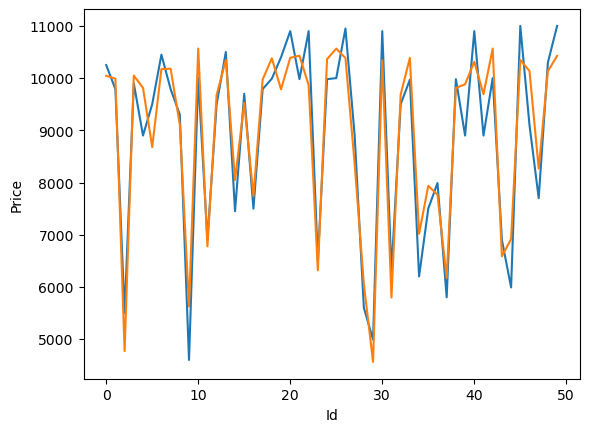

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Price',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()